In [3]:
pip install numpy pandas matplotlib seaborn openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Loading XLSX dataset
df = pd.read_excel("C:/Users/guthu/Project/Ecommerce_Analysis/Online Retail.xlsx")


In [16]:
#inital inspection 
print("First 5 rows: \n" ,df.head())
print("\nData types :\n ", df.info())
print("\n Missing Values:", df.isnull().sum())
print("\n Duplicates : ", df.duplicated().sum())
print("\n Basic Statistics: ", df.describe())

First 5 rows: 
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------  

In [23]:
# checking Cancellations
cancellations = df[df['InvoiceNo'].astype(str).str.startswith('C', na=False)| (df['Quantity'] < 0)]
print("cancellations:", len(cancellations))

#checking invalid unit prices
invalid_prices = df[df['UnitPrice'] <=0]
print("invalid_unitprices :", len(invalid_prices))

cancellations: 10624
invalid_unitprices : 2517


# Cleaning the Dataset

In [35]:
#Handling Missing Values
df = df.dropna(subset=['CustomerID']) # Drop rows where CustomerID is missing
df['Description'] = df['Description'].fillna('UnKnown') #for production Anaslysis # Fill missing descriptions

#convert datatypes
df['InvoiceNo'] = df['InvoiceNo'].astype(str) # Convert to string (for cancellations check)
df['StockCode'] = df['StockCode'].astype(str)  # Convert to string (categorical)
df['Description'] = df['Description']. astype(str)   # Convert to string (text data)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors = 'coerce')  # Ensure numeric (handles errors)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors = 'coerce') # Parse dates
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors = 'coerce')  # Ensure numeric pricing
df['CustomerID'] = df['CustomerID'].astype(str) # Treat as categorical (not float)
df['Country'] = df['Country'].astype(str) # Convert to string (categorical)

#removing duplicates
df = df.drop_duplicates()

#removing cancellation for salse focused analysis
df = df[~df['InvoiceNo'].str.startswith('C', na=False)]
df = df[df['Quantity'] > 0]

#removing invalid prices
df = df[df['UnitPrice'] >0]

##adding dervied columns for alnaysis
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

#verifying cleaning
print("\n After Cleaning: ")
print("\n missing values:" ,df.isnull().sum())
print("\n duplicates: ", df.duplicated().sum())
print("\n cancellation: ", len(df[df['InvoiceNo'].str.startswith('C') | (df['Quantity'] <0)]))
print("\n Invalid UnitPrice:", len(df[df['UnitPrice'] <=0]))
print("\n Data Types:", df.info())

#save the clean data to csv file for easier use 
df.to_csv('Online_Reatil_Cleaned.csv', index = False)
      


 After Cleaning: 

 missing values: InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
Year           0
Month          0
DayOfWeek      0
Hour           0
dtype: int64

 duplicates:  0

 cancellation:  0

 Invalid UnitPrice: 0
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
 9   Year     

# Running Simple Analaysis, if my cleaned Dataset is Working


 Top_Products:  Description
PAPER CRAFT , LITTLE BIRDIE           168469.600
REGENCY CAKESTAND 3 TIER              142264.750
WHITE HANGING HEART T-LIGHT HOLDER    100392.100
JUMBO BAG RED RETROSPOT                85040.540
MEDIUM CERAMIC TOP STORAGE JAR         81416.730
                                         ...    
PURPLE FRANGIPANI HAIRCLIP                 0.850
VINTAGE BLUE TINSEL REEL                   0.840
SET 12 COLOURING PENCILS DOILEY            0.650
HEN HOUSE W CHICK IN NEST                  0.420
PADS TO MATCH ALL CUSHIONS                 0.003
Name: TotalPrice, Length: 3877, dtype: float64


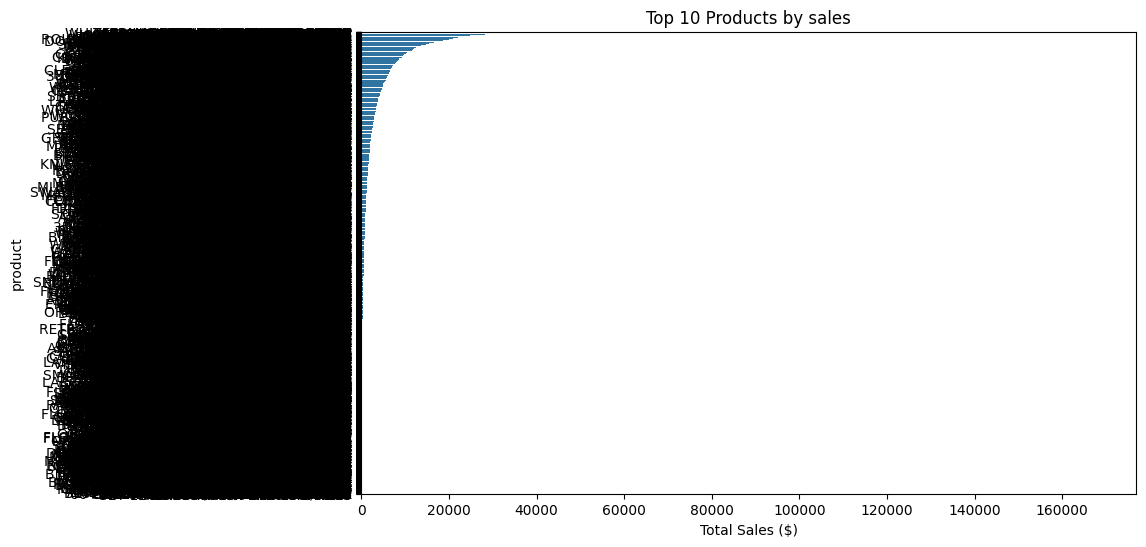

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

#Top 10 product by sales
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending = False)
print("\n Top_Products: ",top_products)

#plotting
plt.figure(figsize = (10,6))
sns.barplot(x=top_products.values, y = top_products.index)
plt.title('Top 10 Products by sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('product')
plt.show()

In [42]:
import os
print(os.getcwd())

C:\Users\guthu\Project\Ecommerce_Analysis
